
### Recurrent Neural  Network 


- RNN is designeed to process sequential data by maintaining a memory of previous inputs. Unlike FNN. 
- RNNs have a feedback loop that allows them to retain information about past inputs 


👉🏻 Key concept : Rnns are ideal for tasks where **order matters** , like time-series forecasting, speech recognition , and language modelling 





#### Structure of an RNN 

+ **input** : sequence of data (e.g. words in sentence)
+ **Hidden State** : Memory that carries information from previous time steps. 

+ **Output** : Prediction at each time step. 


#### RNN Mathematical Formulation 

1. Hidden State Update : 
    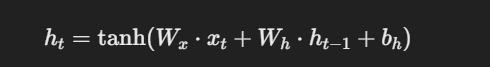    ............Equation 1

    ht = current hidden state 
    xt = input at time t 
    Wx = Input-to-hidden weight matrix 
    Wh = Hidden-to-hidden (recurrent) weight Matrix 
    bh = Bias Term 
    tanh = Activation Function 

2. Output Calculation : 
    yt = Wy.ht + by 

    * yt = Output at time t 
    * Wy = Hidden-to-output weight matrix 
    * by = Output Bias term 


#### Backpropagation through time (BPTT)

- To train an RNN , we use BPTT - and extension of standard back Propagation 

- Steps : 
        + Perform a forward pass through entire sequence to compute outputs 
        + Calculate Loss (e.g. MSE , Cross Entropy) 
        + Propagate the error backwards through time step 
        + Update weights using Gradient descent 

- Problems 
    + **Vanishing Gradient Problem** : Gradients Become too small and stop updating weights. 
    + **Exploding Gradients** : Gradient Becomes too large , leading to instability 


### Types of RNN : 


1. **One-to-One** : Single Input -> Single Output
        * Input -> RNN -> Output 

2. **One-To-Many** : Single Input -> Multiple Outputs Never over time 
        * Generate sequence from fixed input 

        * Input -> RNN -> Output1 -> Output2 -> Output3 -> .... 

3. **Many-To-One** : Multiple Inputs -> Single Output
        * UseCase: Summarize or classify a sequence 
        * Input1-> Input2 -> Input3 -> RNN -> Output 

4. **Many-to-Many** : (Synchronous) 
        * Structure : Multiple Inputs -> Multiple Outputs (with equal lengths)
        * Use Case : Processes Sequences where output is needed at each step 
        * Diagram : 

         Input1 -> RNN -> Output1 
         Input2 -> RNN -> Output2 
         Input3 -> RNN -> Output3 
    
5. **Many-to-Many** :(Asynchronous/Seq2Seq) 
        
        * Structure : Multiple inputs -> Multiple Outputs(With different lengths) 
        * Use Case : Tasks where input and output length differ 
        * Example : 
                + Machine Translation : Input : "Bonjour" -> Output: "Hello" 
                + Input : User query -> Output: Response 


    Input1 -> Input2 -> Input3 -> RNN -> Output1 -> Output2 

6. **Bidirectional RNN** (Bi- RNN) 
    * Structure : Processes Sequences **forward** and **Backward**
    * Use case : Contex-sensitive tasks where the future information is useful 

    * Example : 
            * Speech Recognition : Use both **past and future** context for accuracy 
            * Named Entity Recognition(NER) : Identifying names , location etc. 
            ← Input1 ← Input2 ← Input3 
            → Input1 → Input2 → Input3


7. Deep RNN (Stacked RNN) : 

    * structure : Multiple RNN layers stacked on top of each other 
    * use case : Capture Complex Patterns with better memory capacity 

    * example : 
        * Generate Paragraphs of Text 
        * speech-to-text : Recognize long audio inputs 

        *Diagram: 
            Input -> RNN layer1 -> RNN Layer 2 -> Output 


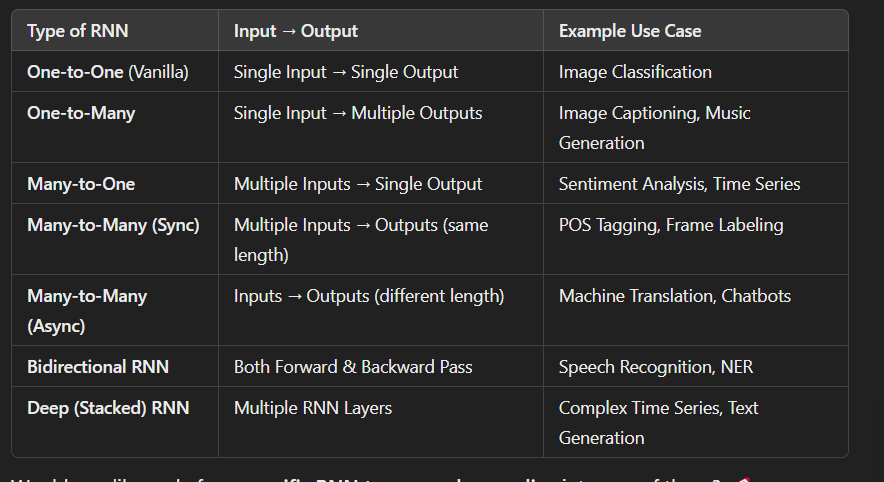
        
    


In [24]:
def relu(x) : 
    return np.maximum(0,x) 

def relu_derivative(x):
    return (x>0).astype(float)

In [2]:
import numpy as np 

In [3]:
def tanh(x): 
    return np.tanh(x) 

def tanh_derivative(x) : 
    return 1 - np.tanh(x) ** 2 



In [ ]:
import numpy as np

def swish_relu(x, beta=1):
    return x * (1 / (1 + np.exp(-beta * x)))

# Derivative of Swish-ReLU (for backpropagation)
def swish_relu_derivative(x, beta=1):
    sigmoid = 1 / (1 + np.exp(-beta * x))
    return sigmoid + beta * x * sigmoid * (1 - sigmoid)

In [28]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W_xh = np.random.randn(hidden_size, input_size) * np.sqrt(1. / input_size)
        self.W_hy = np.random.randn(output_size, hidden_size) * np.sqrt(1. / hidden_size)
        self.W_hh = np.random.randn(hidden_size, hidden_size) * np.sqrt(1. / hidden_size)
        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))

    def forward(self, inputs):
        h = np.zeros((self.hidden_size, 1))
        self.hidden_states = [h]
        outputs = []

        for x in inputs:
            x = x.reshape(-1, 1)
            h = swish_relu(np.dot(self.W_xh, x) + np.dot(self.W_hh, h) + self.b_h)
            self.hidden_states.append(h)
            y = np.dot(self.W_hy, h) + self.b_y
            outputs.append(y)

        return outputs

    def backward(self, inputs, targets, learning_rate=0.001):
        outputs = self.forward(inputs)  # Get outputs from forward pass

        dh_next = np.zeros((self.hidden_size, 1))
        dW_xh = np.zeros_like(self.W_xh)
        dW_hh = np.zeros_like(self.W_hh)
        dW_hy = np.zeros_like(self.W_hy)
        db_h = np.zeros_like(self.b_h)
        db_y = np.zeros_like(self.b_y)

        # Iterate backwards through time
        for t in reversed(range(len(inputs))):
            x = inputs[t].reshape(-1, 1)
            h = self.hidden_states[t + 1]
            h_prev = self.hidden_states[t]

            # Output error
            dy = outputs[t] - targets[t]
            dW_hy += np.dot(dy, h.T)
            db_y += dy

            # Backpropagate to hidden state
            dh = np.dot(self.W_hy.T, dy) + dh_next
            dh_raw = dh * swish_relu_derivative(h)

            # Gradients of hidden state and input weights
            dW_xh += np.dot(dh_raw, x.T)
            dW_hh += np.dot(dh_raw, h_prev.T)
            db_h += dh_raw

            dh_next = np.dot(self.W_hh.T, dh_raw)

        # Update parameters using gradient descent
        for param, dparam in zip([self.W_xh, self.W_hh, self.W_hy, self.b_h, self.b_y],
                                 [dW_xh, dW_hh, dW_hy, db_h, db_y]):
            param -= learning_rate * dparam

        return outputs

    def train(self, inputs, targets, epoch=1000, learning_rate=0.001):
        for e in range(epoch):
            outputs = self.backward(inputs, targets, learning_rate)

            if e % 100 == 0:
                loss = np.mean((np.array(outputs) - np.array(targets)) ** 2)
                print(f'Epoch {e}, Loss: {loss:.4f}')


In [29]:
inputs = [np.array([1]), np.array([2]) , np.array([3]), np.array([4])]

targets = [np.array([2]),np.array([3]),np.array([4]), np.array([5])]

rnn = SimpleRNN(input_size= 1 , hidden_size= 5 , output_size= 1 ) 

rnn.train(inputs , targets ,epoch = 1000 , learning_rate = 0.001 )


test_input = [np.array([5]), np.array([6]) , np.array([7])]

predictions = rnn.forward(test_input ) 


print("Predictions") 

for p in predictions : 
    print(p.flatten())

Epoch 0, Loss: 13.6541
Epoch 100, Loss: 3.9954
Epoch 200, Loss: 3.5251
Epoch 300, Loss: 3.2353
Epoch 400, Loss: 3.0443
Epoch 500, Loss: 2.9123
Epoch 600, Loss: 2.8177
Epoch 700, Loss: 2.7481
Epoch 800, Loss: 2.6959
Epoch 900, Loss: 2.6562
Predictions
[5.48485797]
[7.39905146]
[7.8532839]
